In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# 1. Load Data
X_train = pd.read_csv('cleveland_X_train_processed.csv')
X_test = pd.read_csv('cleveland_X_test_processed.csv')
y_train = pd.read_csv('cleveland_y_train_processed.csv').values.ravel()
y_test = pd.read_csv('cleveland_y_test_processed.csv').values.ravel()

In [9]:
# 2. Initialize and Fit Base Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [10]:
# 3. Evaluate on Training Data
y_train_pred = gb.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [11]:
print("Training Set Results:")
print(f"Accuracy:  {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision * 100:.2f}%")
print(f"Recall:    {train_recall * 100:.2f}%")
print(f"F1 Score:  {train_f1 * 100:.2f}%")

Training Set Results:
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%
F1 Score:  100.00%


In [12]:
# 4. Evaluate on Test Data
y_test_pred = gb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [13]:
print("Test Set Results:")
print(f"Accuracy:  {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall:    {test_recall * 100:.2f}%")
print(f"F1 Score:  {test_f1 * 100:.2f}%")

Test Set Results:
Accuracy:  82.42%
Precision: 82.93%
Recall:    79.07%
F1 Score:  80.95%


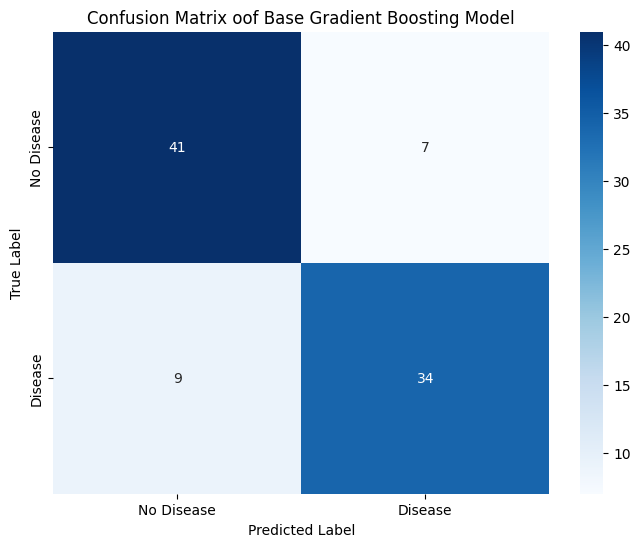

In [14]:
# 5. Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix oof Base Gradient Boosting Model')
plt.show()

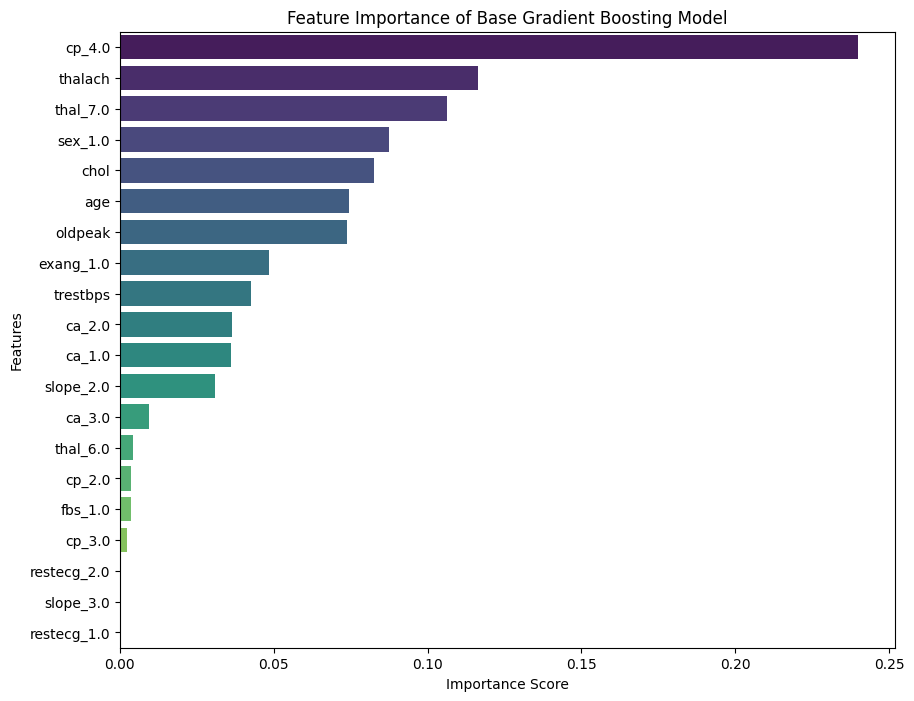

In [15]:
# 8. Visualization of Feature Importance
# Get importance from the trained model
importances = gb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy sorting and plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the Top Features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df, palette='viridis', legend=False)
plt.title('Feature Importance of Base Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()